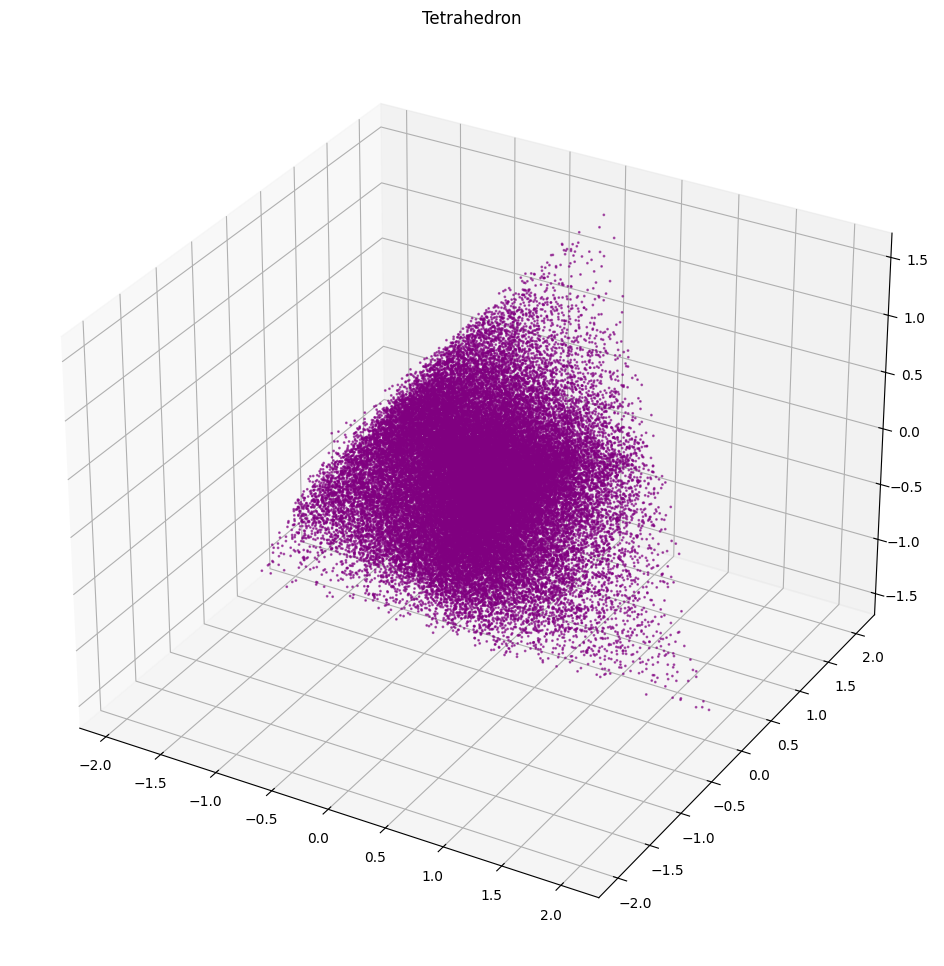

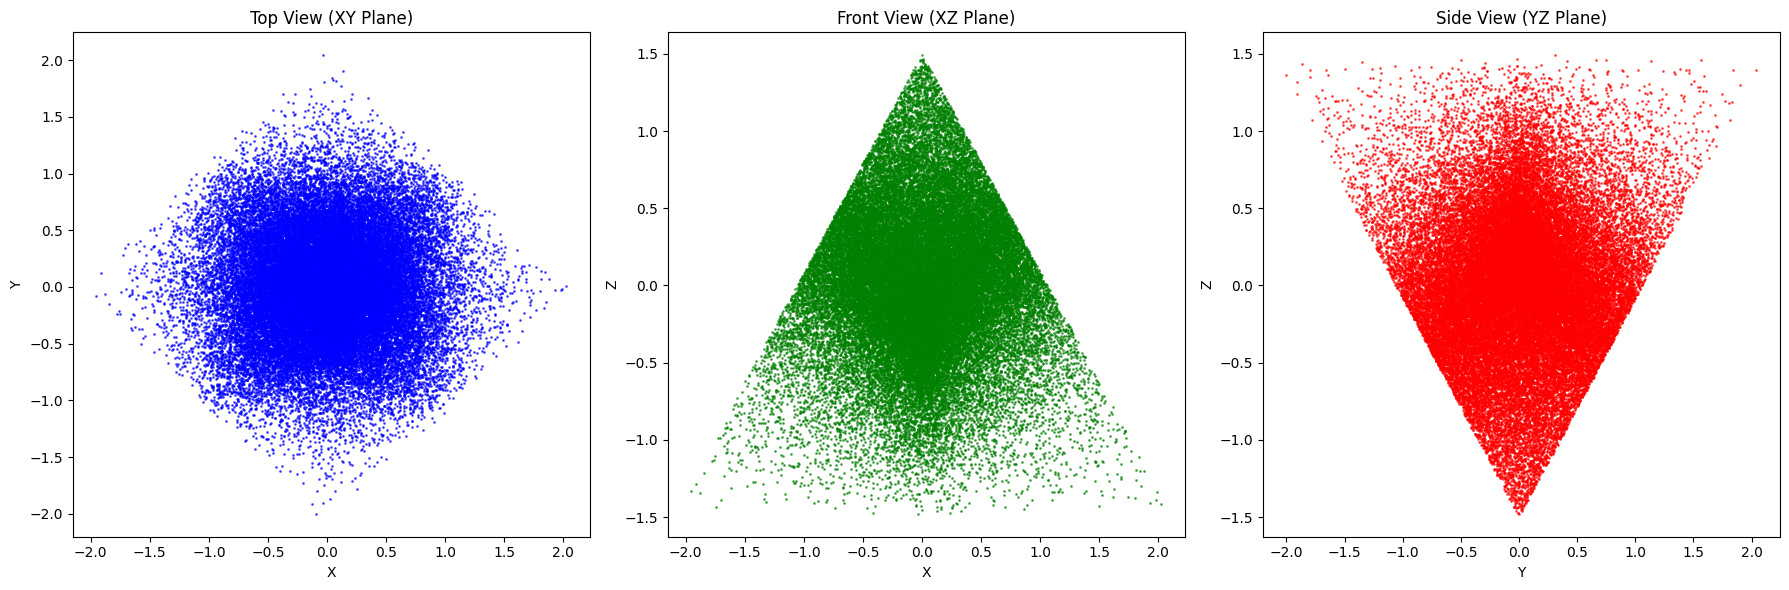

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate different shapes (ellipsoid, cube, tetrahedron, torus)
def generate_shape(shape_type, num_points, expansion_rate=1.0, rotation_angle=0):
    if shape_type == 'ellipsoid':
        # Generate Ellipsoid shape
        angles1 = np.random.uniform(0, 2 * np.pi, num_points)
        angles2 = np.random.uniform(0, np.pi, num_points)
        radii = np.random.uniform(0, 100, num_points)**(1/3)
        x = radii * np.sin(angles2) * np.cos(angles1)
        y = radii * np.sin(angles2) * np.sin(angles1)
        z = radii * np.cos(angles2)
        points = np.column_stack((x, y, z))
    
    elif shape_type == 'cube':
        # Generate Cube shape
        side_length = 20
        half_side = side_length / 2
        x = np.random.uniform(-half_side, half_side, num_points)
        y = np.random.uniform(-half_side, half_side, num_points)
        z = np.random.uniform(-half_side, half_side, num_points)
        points = np.column_stack((x, y, z))
    
    elif shape_type == 'tetrahedron':
        # Generate Tetrahedron shape
        vertices = np.array([[1, 1, 1], [-1, -1, 1], [-1, 1, -1], [1, -1, -1]])
        weights = np.random.rand(num_points, 4)
        weights /= weights.sum(axis=1, keepdims=True)
        points = np.dot(weights, vertices)
    
    elif shape_type == 'torus':
        # Generate Torus shape'ellipsoid'um_points)  
            phi = np.random.uniform(0, 2 * np.pi, num_points)    
            x = (R + r * np.cos(phi)) * np.cos(theta)
            y = (R + r * np.cos(phi)) * np.sin(theta)
            z = r * np.sin(phi)
            return np.column_stack((x, y, z))

        points = generate_torus_points(70, 20, num_points)
    
    # Apply scaling
    scaling_matrix = np.array([[expansion_rate, 0, 0], [0, expansion_rate, 0], [0, 0, expansion_rate]])
    points = points @ scaling_matrix.T

    # Apply rotation
    rotation_matrix = np.array([
        [np.cos(rotation_angle), -np.sin(rotation_angle), 0],
        [np.sin(rotation_angle), np.cos(rotation_angle), 0],
        [0, 0, 1]
    ])
    points = points @ rotation_matrix.T

    return points

# Function to plot the generated shape
def plot_shape(points, shape_type):
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(111, projection='3d')

    if shape_type == 'ellipsoid':
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, color='blue', alpha=0.6)
        ax.set_title("Ellipsoid")
    elif shape_type == 'cube':
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, color='orange', alpha=0.6)
        ax.set_title("Cube")
    elif shape_type == 'tetrahedron':
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, color='purple', alpha=0.6)
        ax.set_title("Tetrahedron")
    elif shape_type == 'torus':
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=1, color='red', alpha=0.6)
        ax.set_title("Torus")

    plt.show()

# Function to plot three views of the shape (Top, Front, Side)
def plot_three_views(points):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    # Top view (XY plane)
    axs[0].scatter(points[:, 0], points[:, 1], s=1, color='blue', alpha=0.6)
    axs[0].set_title("Top View (XY Plane)")
    axs[0].set_xlabel("X")
    axs[0].set_ylabel("Y")
    
    # Front view (XZ plane)
    axs[1].scatter(points[:, 0], points[:, 2], s=1, color='green', alpha=0.6)
    axs[1].set_title("Front View (XZ Plane)")
    axs[1].set_xlabel("X")
    axs[1].set_ylabel("Z")
    
    # Side view (YZ plane)
    axs[2].scatter(points[:, 1], points[:, 2], s=1, color='red', alpha=0.6)
    axs[2].set_title("Side View (YZ Plane)")
    axs[2].set_xlabel("Y")
    axs[2].set_ylabel("Z")
    
    plt.tight_layout()
    plt.show()

# Example usage
shape_type = 'tetrahedron'
num_points = 50000
expansion_rate = 1.5
rotation_angle = np.radians(45)

# Generate points for the shape
points = generate_shape(shape_type, num_points, expansion_rate, rotation_angle)

# Plot the full 3D shape
plot_shape(points, shape_type)

# Plot the three views (Top, Front, Side)
plot_three_views(points)


In [4]:
points

array([[ 0.37645252, -0.24003567, -0.37934664],
       [-0.47380345, -0.09312367, -0.27931794],
       [ 0.34076773,  1.38937508,  0.75814059],
       ...,
       [-0.13409077, -0.3848835 ,  0.81524122],
       [-0.0454622 , -0.017387  , -0.43478034],
       [ 0.45349388, -0.2728746 ,  0.76792161]])